# TEMPERATURE PREDICTION PROJECT

NAME: Vaibhav  Tayade
Contact: 8087970061
Email id: vaibhav_t29@rediffmail.com

# IMPORTING RELEVANT LIBRARIES:

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import numpy as np

from scipy.stats import zscore

from sklearn.preprocessing import StandardScaler
from sklearn import metrics

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import ElasticNet

from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# IMPORTING DATA FILE:

In [3]:
df = pd.read_csv('temperature_prediction.csv')

In [4]:
# checking presence of null values:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

Observation: We can see that there are presence of NULL values in the dataset.

In [5]:
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7750.000000,7682.000000,7682.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,...,7677.000000,7677.000000,7677.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7725.000000,7725.000000
mean,13.000000,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,0.368774,...,0.485003,0.278200,0.269407,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220
std,7.211568,2.969999,2.413961,14.668111,7.192004,2.947191,2.345347,2.183836,33.730589,0.262458,...,1.762807,1.161809,1.206214,0.050352,0.079435,54.279780,1.370444,429.158867,3.128010,2.487613
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.700000,45.963543,84.222862,27.673499,22.089739,5.678705,37.266753,0.146654,...,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.300000
50%,13.000000,29.900000,23.400000,55.039024,89.793480,29.703426,23.760199,6.547470,56.865482,0.315697,...,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,32.000000,24.900000,67.190056,93.743629,31.710450,25.152909,8.032276,84.223616,0.575489,...,0.018364,0.007896,0.000041,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000


OBSERVATION: We can see that there are few columns where Mean values are higher than the Median values, which indicates presence of Outliers in the dataset.

In [6]:
# checking presence of skewness:
df.skew()

station             0.000000
Present_Tmax       -0.262942
Present_Tmin       -0.365875
LDAPS_RHmin         0.298765
LDAPS_RHmax        -0.850870
LDAPS_Tmax_lapse   -0.226775
LDAPS_Tmin_lapse   -0.578943
LDAPS_WS            1.571581
LDAPS_LH            0.670491
LDAPS_CC1           0.457231
LDAPS_CC2           0.470060
LDAPS_CC3           0.637630
LDAPS_CC4           0.663251
LDAPS_PPT1          5.367675
LDAPS_PPT2          5.747360
LDAPS_PPT3          6.425829
LDAPS_PPT4          6.792379
lat                 0.087062
lon                -0.285213
DEM                 1.723257
Slope               1.563020
Solar radiation    -0.511210
Next_Tmax          -0.339607
Next_Tmin          -0.403743
dtype: float64

OBSERVATION: We can see that there are presence of skewness in majority of columns in the datasets.

In [7]:
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

NOTE :    REMOVING COLUMN 'DATE' AS IT IS IRRELAVANT WITH THE DATASET.

In [8]:
# removing 'Date' column.
df = df[['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin']]

In [9]:
df.columns

Index(['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

NOTE: 'DATE' COLUMN HAS BEEN REMOVED.

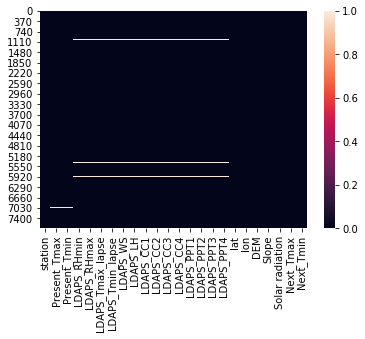

In [12]:
sns.heatmap(df.isnull())

OBSERVATION: WE can see in the above heatmap, majority of the columns has Null values in the dataset.

# we need to replace this NULL values with either mean or median values.

# Plotting distplot

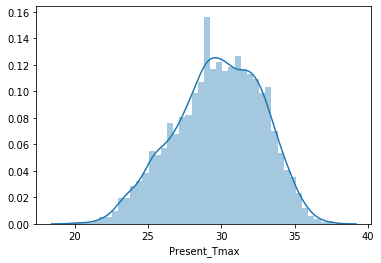

In [13]:
# distplot 1 >>>
sns.distplot(df['Present_Tmax'])

Observation: Little skewness present

In [23]:
df['Present_Tmax'].mean()

29.76821140328037

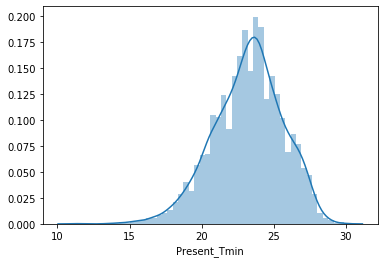

In [16]:
# distplot 2 >>>
sns.distplot(df['Present_Tmin'])

Observation: skewness present

In [21]:
df['Present_Tmin'].mean()

23.22505857849521

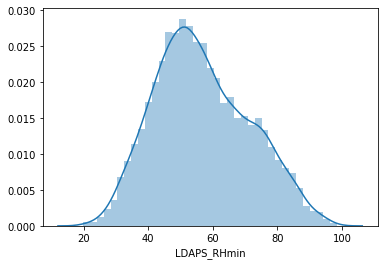

In [18]:
#distplot 3 >>>
sns.distplot(df['LDAPS_RHmin'])

Observation: Little skewness present

In [20]:
df['LDAPS_RHmin'].mean()

56.75937215069287

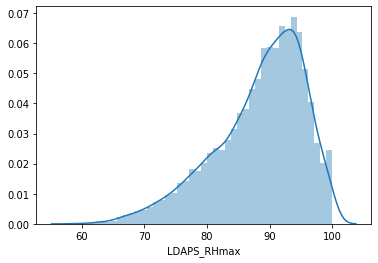

In [19]:
#distplot 4 >>>
sns.distplot(df['LDAPS_RHmax'])

Observation: Little skewness present

In [24]:
df['LDAPS_RHmax'].mean()

88.37480388719037

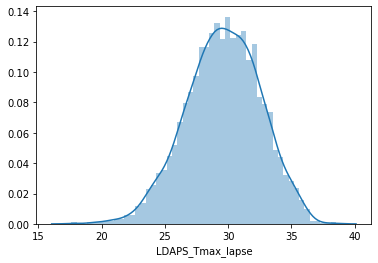

In [25]:
# distplot 5 >>>
sns.distplot(df['LDAPS_Tmax_lapse'])

Observation: skewness present

In [26]:
df['LDAPS_Tmax_lapse'].mean()

29.613446542813577

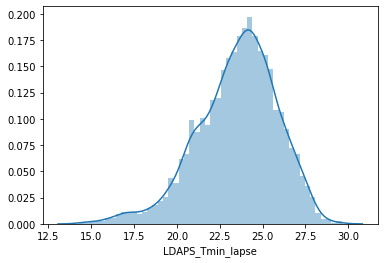

In [27]:
# distplot 6 >>>
sns.distplot(df['LDAPS_Tmin_lapse'])


Observation: Little skewness present

In [28]:
df['LDAPS_Tmin_lapse'].mean()

23.512588776279873

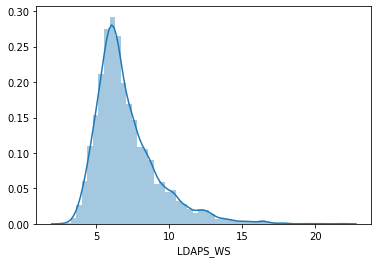

In [29]:
# distplot 7 >>>
sns.distplot(df['LDAPS_WS'])


Observation: Highly skewed

In [30]:
df['LDAPS_WS'].mean()

7.097874569625358

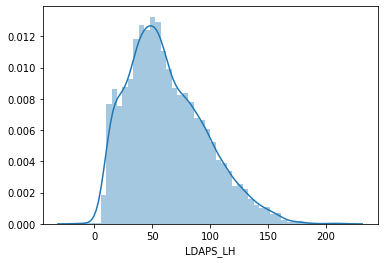

In [31]:
# distplot 8 >>>
sns.distplot(df['LDAPS_LH'])


Observation: skewness present

In [32]:
df['LDAPS_LH'].mean()

62.505018909340585

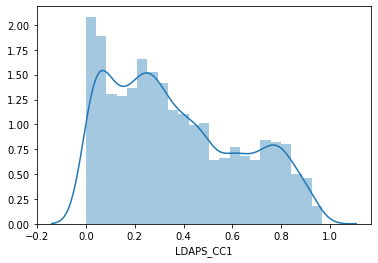

In [33]:
# distplot 9 >>>
sns.distplot(df['LDAPS_CC1'])
#median

Observation: skewness present 

In [34]:
df['LDAPS_CC1'].median()

0.315696837

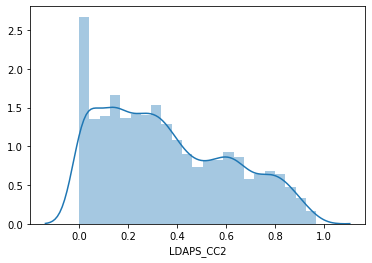

In [35]:
# distplot 10 >>>
sns.distplot(df['LDAPS_CC2'])
#median

Observation: skewness present

In [36]:
df['LDAPS_CC2'].median()

0.312421315

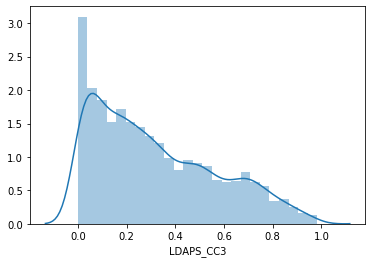

In [37]:
# distplot 11 >>>
sns.distplot(df['LDAPS_CC3'])
#median

Observation: skewness present

In [38]:
df['LDAPS_CC3'].median()

0.26255460399999997

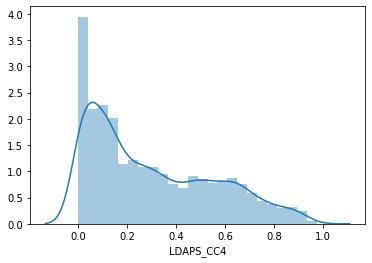

In [39]:
# distplot 12 >>>
sns.distplot(df['LDAPS_CC4'])
#median

Observation: skewness present

In [40]:
df['LDAPS_CC4'].median()

0.22766446899999998

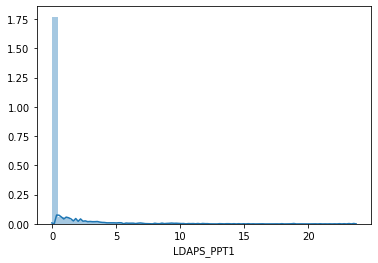

In [41]:
# distplot 13 >>>
sns.distplot(df['LDAPS_PPT1'])
#mean

Observation: Highly skewed

In [42]:
df['LDAPS_PPT1'].mean()

0.5919945266984501

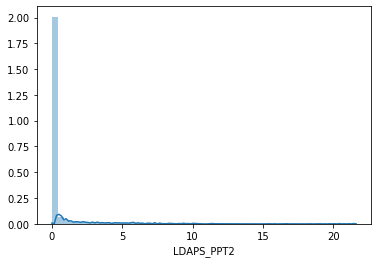

In [43]:
# distplot 14 >>>
sns.distplot(df['LDAPS_PPT2'])
#mean

Observation: Highly skewed

In [44]:
df['LDAPS_PPT2'].mean()

0.4850025590969125

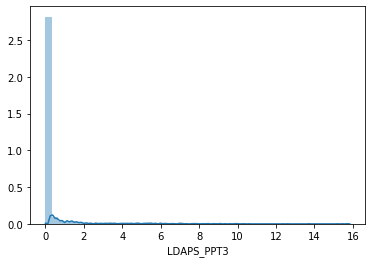

In [45]:
# distplot 15 >>>
sns.distplot(df['LDAPS_PPT3'])
#mean

Observation: Highly skewed

In [46]:
df['LDAPS_PPT3'].mean()

0.2781996392747162

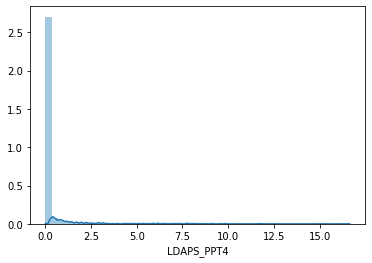

In [47]:
# distplot 16 >>>
sns.distplot(df['LDAPS_PPT4'])
#mean

Observation: Highly skewed

In [48]:
df['LDAPS_PPT4'].mean()

0.26940734997772564

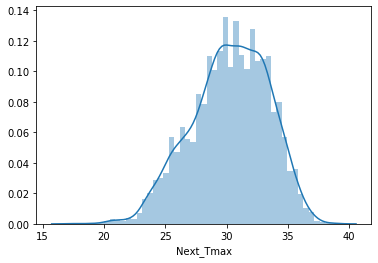

In [49]:
# distplot 17 >>>
sns.distplot(df['Next_Tmax'])
#mean

Observation: little skewed

In [50]:
df['Next_Tmax'].mean()

30.274886731391593

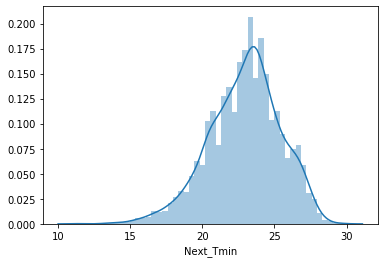

In [51]:
# distplot 18 >>>
sns.distplot(df['Next_Tmin'])
#mean

Observation: Highly skewed

In [52]:
df['Next_Tmin'].mean()

22.93222006472492

REPLACING NULL VALUES WITH MEAN OR MEDIAN WITH RESPECT TO THEIR DISTPLOT:

In [53]:
df['station'].fillna(13, inplace=True)
df['Present_Tmax'].fillna(29.76, inplace=True)
df['Present_Tmin'].fillna(23.22, inplace=True)
df['LDAPS_RHmin'].fillna(56.759372, inplace=True)
df['LDAPS_RHmax'].fillna(88.374803, inplace=True)
df['LDAPS_Tmax_lapse'].fillna(29.613446, inplace=True)
df['LDAPS_Tmin_lapse'].fillna(23.512588, inplace=True)
df['LDAPS_WS'].fillna(7.097874, inplace=True)
df['LDAPS_LH'].fillna(62.505018, inplace=True)
df['LDAPS_CC1'].fillna(0.315696, inplace=True)
df['LDAPS_CC2'].fillna(0.312421, inplace=True)
df['LDAPS_CC3'].fillna(0.262554, inplace=True)
df['LDAPS_CC4'].fillna(0.227664, inplace=True)
df['LDAPS_PPT1'].fillna(0.591994, inplace=True)
df['LDAPS_PPT2'].fillna(0.485002, inplace=True)
df['LDAPS_PPT3'].fillna(0.278199, inplace=True)
df['LDAPS_PPT4'].fillna(0.269407, inplace=True)
df['Next_Tmax'].fillna(30.2, inplace=True)
df['Next_Tmin'].fillna(22.9, inplace=True)

In [54]:
#all null values have been filled.
df.isnull().sum()

station             0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

OBSERVATION: NOW NO NULL VALUES PRESENT IN THE DATASET.

# CHECKING OUTLIERS USING BOX PLOT:

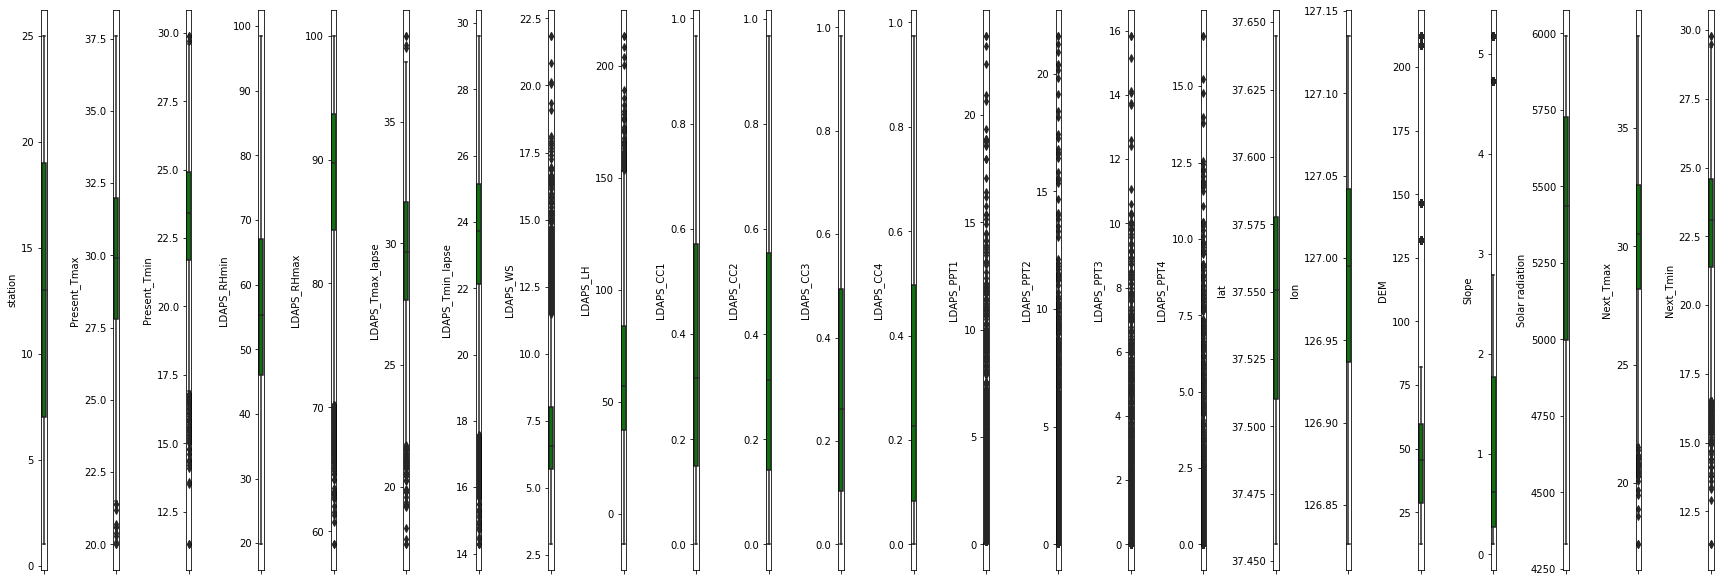

In [55]:
column_list = df.columns.values
ncol=24
nrows=15

plt.figure(figsize=(ncol,5*ncol))
for i in range(0, len(column_list)):
    plt.subplot(nrows, ncol, i+1)
    sns.boxplot(df[column_list[i]],color='green',orient='v')
    plt.tight_layout()

In [56]:
df.columns

Index(['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

OBSERVATION: 

We can observe in the above box plot there are many columns where outliers are present like Present_Tmax, Present_Tmin, LDAPS_RHmax, LDAPS_Tmax_lapse, LDAPS_Tmin_lapse, LDAPS_WS, LDAPS_LH, LDAPS_PPT1, LDAPS_PPT2, LDAPS_PPT3, LDAPS_PPT4, DEM, Slope, Next_Tmax, Next_Tmin.

# BIVARIATE ANALYSIS:

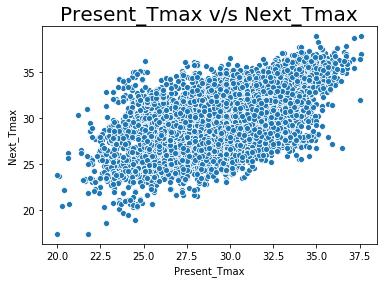

In [60]:
# scatter plot 1 >>>
plt.title('Present_Tmax v/s Next_Tmax', fontsize = 20)

sns.scatterplot(df['Present_Tmax'], df['Next_Tmax'])

Observation: There is slight linear relation between Present_Tmax values and Next_Tmax values.

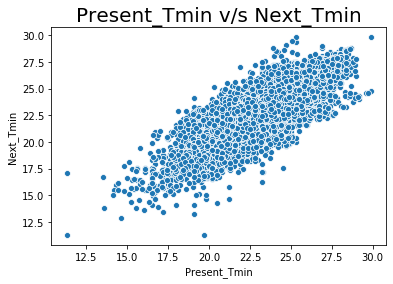

In [61]:
# scatter plot 2 >>>
plt.title('Present_Tmin v/s Next_Tmin', fontsize = 20)

sns.scatterplot(df['Present_Tmin'], df['Next_Tmin'])

Observation: There is a linear relation between Present_Tmin and Next_Tmin values.

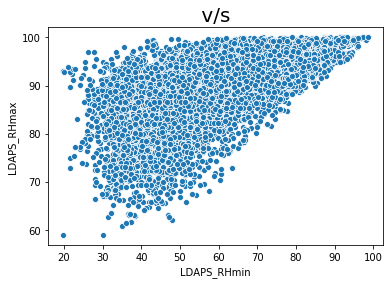

In [59]:
# scatter plot 3 >>>
plt.title('LDAPS_RHmin v/s LDAPS_RHmax', fontsize = 20)

sns.scatterplot(df['LDAPS_RHmin'], df['LDAPS_RHmax'])

Observation: There is no proper relationship between LDAPS_RHmin and LDAPS_RHmax.

# CHECKING CORRELATION MATRIX:

In [62]:
df_cor = df.corr()

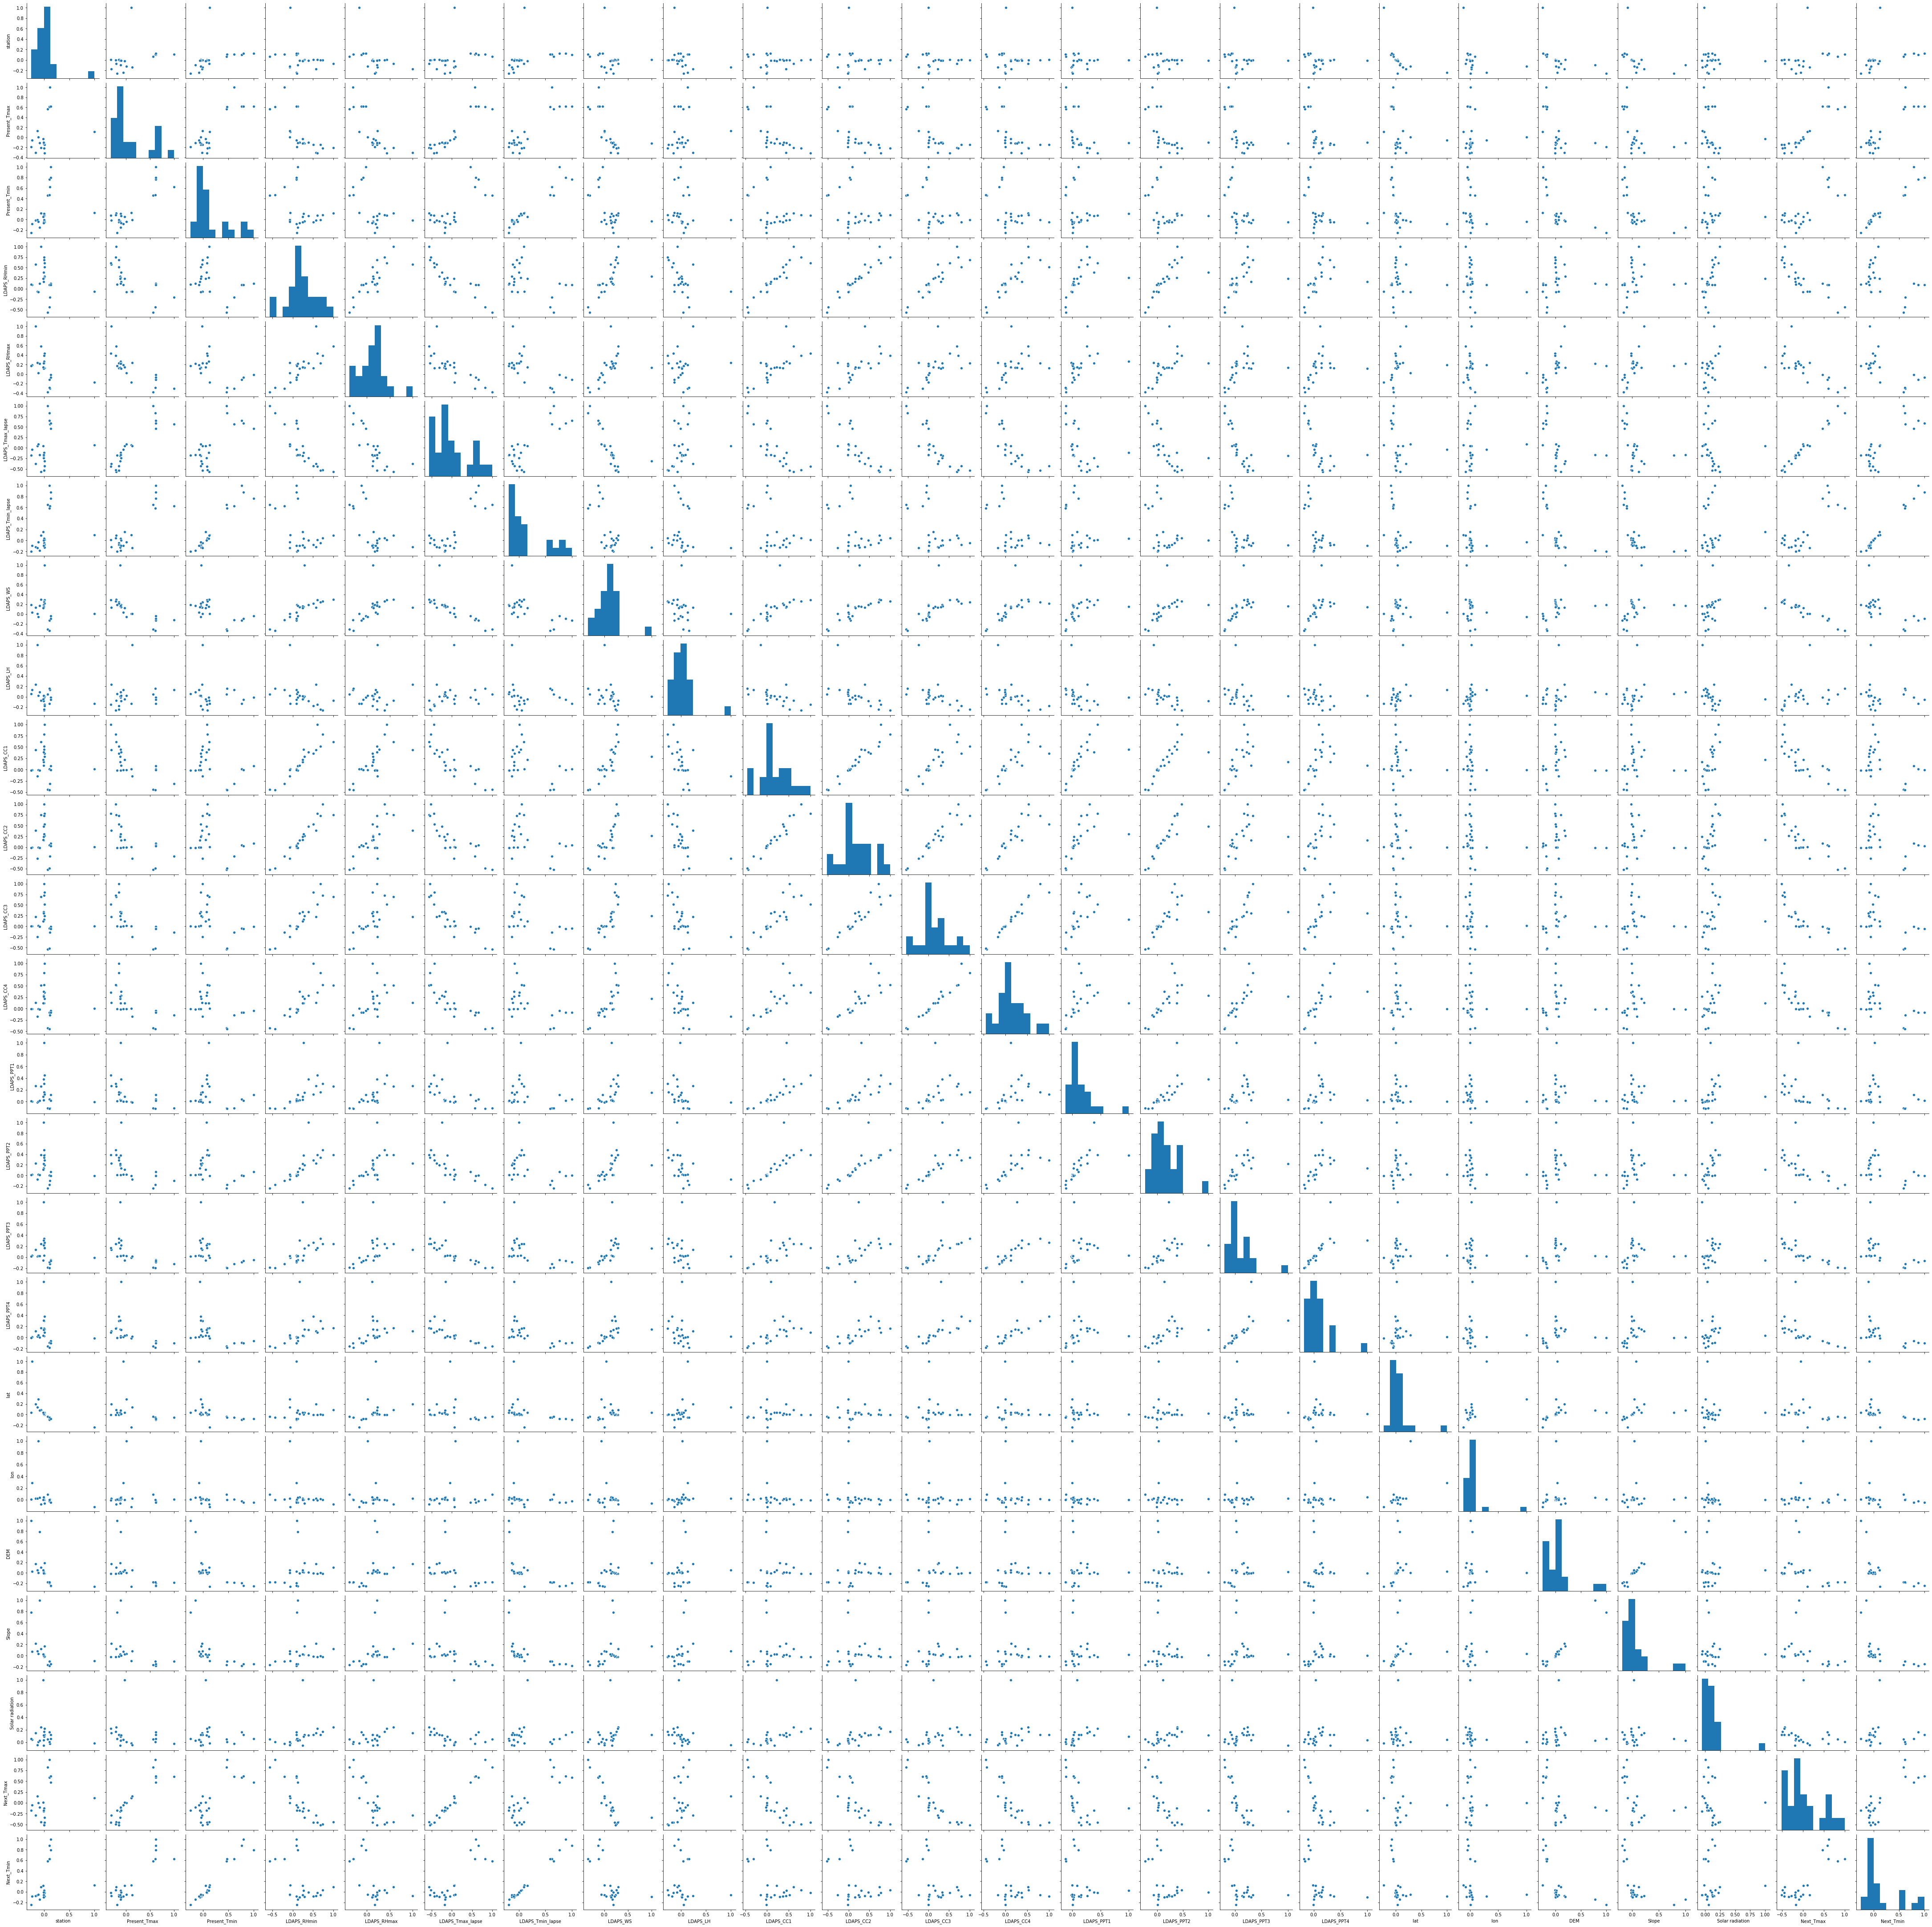

In [63]:
sns.pairplot(df_cor)

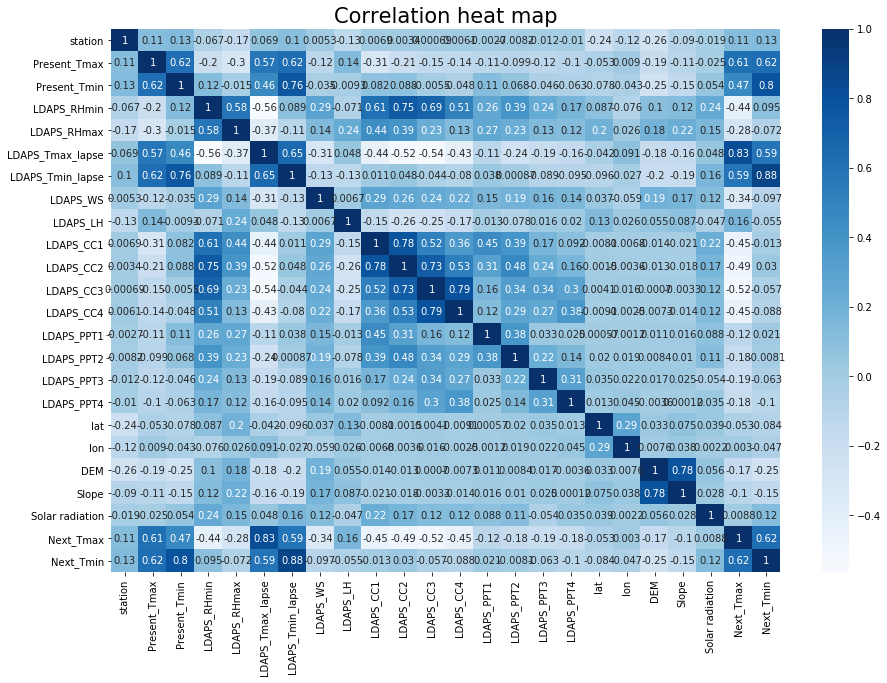

In [65]:
plt.figure(figsize=(15,10))
plt.title('Correlation heat map', fontsize = 21)

sns.heatmap(df_cor,cmap='Blues', annot=True)

# OBSERVATION:

Present_Tmax and Present_Tmin are highly correlated with both Next_Tmax and Next_Tmin.

# REMOVING OUTLIERS USING ZSCORE METHOD:

In [68]:
# removing outliers with the help of zscore methods.
z=np.abs(zscore(df))


In [69]:
threshold = 3
print(np.where(z>threshold))

#creating new dataset without outliers and skewness
df_new = df[(z<3).all(axis=1)]


(array([  25,   25,   26, ..., 7751, 7751, 7751], dtype=int64), array([ 7, 14, 14, ..., 14, 15, 16], dtype=int64))


In [70]:
print(((df.shape[0]-df_new.shape[0])/df.shape[0]*100))

11.06811145510836


OBSERVATION: We are loosing more than 11% of data after removing outliers, we cannot afford to do so. so we'll keep outliers as it is, as it may be internal property of our dataset.

NOTE: MAKING SEPARATE MODEL ANALYSIS FOR next_Tmax and next_Tmin data prediction.

# CREATING DATASET:

In [71]:
# creating x,y dataset for further model building.
X = df.iloc[:,0:22]

In [72]:
Y_next_Tmax = df.iloc[:,-2]

In [73]:
Y_next_Tmin = df.iloc[:,-1]

In [74]:
X

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,0.130928,0.000000,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,0.127727,0.000000,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,0.142125,0.000000,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,0.134249,0.000000,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,0.170021,0.000000,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,...,0.000000,0.000000,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965
7748,24.0,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,...,0.000000,0.000000,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535
7749,25.0,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,0.048954,...,0.000796,0.000000,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215
7750,13.0,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508


In [75]:
X.columns

Index(['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation'],
      dtype='object')

# SCALING THE DATASET:

In [76]:
#Scaling the dataset::
sc = StandardScaler()
x_scaled= sc.fit_transform(X)
columnslist = ['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation']

X_1 = pd.DataFrame(x_scaled, columns = columnslist)

# FOR PREDICTING Next_TMAX:

In [77]:
#creating train test dataset from the x and y part inoder to start model making.

x_train, x_test, y_train, y_test = train_test_split(X_1, Y_next_Tmax, test_size=.20, random_state=42)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(6201, 22)
(6201,)
(1551, 22)
(1551,)


# LINEAR REGRESSION:

In [78]:
LR_1 = LinearRegression()
LR_1.fit(x_train, y_train)

LinearRegression()

In [79]:
LR_1.score(x_train, y_train)

0.7690612692413402

In [80]:
predicted_x_values = LR_1.predict(x_test)
print('Predicted values: ', predicted_x_values)

Predicted values:  [28.60975671 34.52389659 26.38033544 ... 30.75808801 26.20947988
 28.31939536]


In [82]:
print(cross_val_score(LR_1, X_1, Y_next_Tmax, cv=5).mean())

0.7051241618178429


In [83]:
print('ERRORS:')
print("MEAN ABSOLUTE ERROR: ", mean_absolute_error(y_test, predicted_x_values))
print("MEAN SQUARED ERROR: ", mean_squared_error(y_test, predicted_x_values))

print('ROOT MEAN SQUARED ERROR: ', np.sqrt(mean_squared_error(y_test, predicted_x_values)))

ERRORS:
MEAN ABSOLUTE ERROR:  1.1301907802903577
MEAN SQUARED ERROR:  2.234563029971397
ROOT MEAN SQUARED ERROR:  1.4948454869890055


In [84]:
print('r2 Score of Linear Regression model: \n')
print(r2_score(y_test, predicted_x_values))

r2 Score of Linear Regression model: 

0.7712101653553912


# Regularization methods:

In [85]:
LS = Lasso(alpha = 0.01)
LS.fit(x_train, y_train)
LS.score(x_train, y_train)

0.7687649263022093

In [86]:
print(cross_val_score(LS, X_1, Y_next_Tmax, cv=5).mean())

0.706796154138283


In [87]:
RD = Ridge(alpha= 0.01)

RD.fit(x_train, y_train)
RD.score(x_train, y_train)

0.7690612692338462

In [88]:
print(cross_val_score(RD, X_1, Y_next_Tmax, cv=5).mean())

0.7051243458071539


# ELASTIC NET REGULARIZATION METHOD:

In [89]:
# elastic net is a combination of both lasso and ridge methods.
ENR= ElasticNet(alpha= 0.01)

ENR.fit(x_train, y_train)
enrpred=ENR.predict(x_test)
print(ENR.score(x_train, y_train))
ENR.coef_

0.7688696631412667


array([ 0.13518633,  0.48470132,  0.08857867,  0.30875685,  0.        ,
        1.76330837,  0.22663438, -0.31175933,  0.24071618, -0.26345903,
       -0.20724221, -0.226632  , -0.25602532,  0.00656476,  0.21449245,
       -0.01802907, -0.        , -0.03348378, -0.12970223, -0.17449254,
        0.19386829,  0.02764014])

In [90]:
print('ERRORS:')
print("MEAN ABSOLUTE ERROR: ", mean_absolute_error(y_test, enrpred))
print("MEAN SQUARED ERROR: ", mean_squared_error(y_test, enrpred))
print('ROOT MEAN SQUARED ERROR: ', np.sqrt(mean_squared_error(y_test, enrpred)))


ERRORS:
MEAN ABSOLUTE ERROR:  1.1295207374832879
MEAN SQUARED ERROR:  2.2386679425407072
ROOT MEAN SQUARED ERROR:  1.4962178793680776


In [91]:
print(cross_val_score(ENR, X_1, Y_next_Tmax, cv=5).mean())

0.7064836370240875


# SUPPORT VECTOR REGRESSOR METHOD:

In [92]:
kernellist = ['linear', 'poly', 'rbf']

for i in kernellist:
    sv = SVR(kernel = i)
    sv.fit(x_train, y_train)
    print('\nkernel : ' + i)
    print(sv.score(x_train, y_train))


kernel : linear
0.7676112123111194

kernel : poly
0.8322965811147102

kernel : rbf
0.8706375698651587


In [93]:
# support vector rbf model is best model among all kernel paramters as it gave higher accuracy:

sv_rbf = SVR('rbf')
sv_rbf.fit(x_train, y_train)
print(sv_rbf.score(x_train, y_train))

0.8706375698651587


In [94]:
from sklearn.model_selection import KFold
cv1 = KFold(n_splits=10, shuffle=True)
print(cross_val_score(sv_rbf, X_1, Y_next_Tmax, cv=cv1).mean())

0.8544054776072887


In [95]:
# predicting x_test dataset
svpred=sv_rbf.predict(x_test)

In [96]:
# checking errors:

print('ERRORS:')
print("MEAN ABSOLUTE ERROR: ", mean_absolute_error(y_test, svpred))
print("MEAN SQUARED ERROR: ", mean_squared_error(y_test, svpred))
print('ROOT MEAN SQUARED ERROR: ', np.sqrt(mean_squared_error(y_test, svpred)))

ERRORS:
MEAN ABSOLUTE ERROR:  0.8570464400692294
MEAN SQUARED ERROR:  1.3784980329714989
ROOT MEAN SQUARED ERROR:  1.1740945587862583


In [97]:
# checking r2 score error of support vector regressor rbf model

print(r2_score(y_test, svpred))

0.8588599503387001


# DECISION TREE REGRESSION METHOD:

In [98]:
# checking decision tree regressor method.

dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)
dtr.score(x_train,y_train)
preddtr = dtr.predict(x_test)

print(dtr.score(x_train, y_train))

1.0


In [99]:
y_pred = dtr.predict(x_test)
y_pred

array([28.1, 35.5, 25.2, ..., 25.7, 24.2, 27.2])

In [100]:
print('ERRORS:')
print("MEAN ABSOLUTE ERROR: ", mean_absolute_error(y_test, y_pred))
print("MEAN SQUARED ERROR: ", mean_squared_error(y_test, y_pred))
print('ROOT MEAN SQUARED ERROR: ', np.sqrt(mean_squared_error(y_test, y_pred)))

ERRORS:
MEAN ABSOLUTE ERROR:  1.06963249516441
MEAN SQUARED ERROR:  2.391450676982592
ROOT MEAN SQUARED ERROR:  1.546431594666441


In [101]:
# checking cross validation score of decision tree regressor model
cv1 = KFold(n_splits=10, shuffle=True)

print(cross_val_score(dtr, X_1, Y_next_Tmax, cv=cv1).mean())

0.7831521316592979


# RANDOM FOREST REGRESION METHOD:

In [102]:
# Using Random forest regressor algorithm.

rf = RandomForestRegressor(n_estimators=100)
rf.fit(x_train, y_train)
pred = rf.predict(x_test)

In [103]:
print(rf.score(x_train, y_train))

0.9851677626855633


In [104]:
print('ERRORS:')
print("MEAN ABSOLUTE ERROR: ", mean_absolute_error(y_test, pred))
print("MEAN SQUARED ERROR: ", mean_squared_error(y_test, pred))
print('ROOT MEAN SQUARED ERROR: ', np.sqrt(mean_squared_error(y_test, pred)))


ERRORS:
MEAN ABSOLUTE ERROR:  0.7029703417150225
MEAN SQUARED ERROR:  0.8655502327530619
ROOT MEAN SQUARED ERROR:  0.930349521821268


In [105]:
# checking cross validation score of random forest regressor model.
cv1 = KFold(n_splits=10, shuffle=True)

print(cross_val_score(rf, X_1, Y_next_Tmax, cv=cv1).mean())

0.9028827094975164


# ADA BOOST REGRESSOR METHOD:

In [106]:
# Using ada boost regressor algorithm.

adr = AdaBoostRegressor(n_estimators=100)
adr.fit(x_train, y_train)
pred=adr.predict(x_test)
print(adr.score(x_train, y_train))

0.7551360026394357


In [107]:
print('ERRORS:')
print("MEAN ABSOLUTE ERROR: ", mean_absolute_error(y_test, pred))
print("MEAN SQUARED ERROR: ", mean_squared_error(y_test, pred))
print('ROOT MEAN SQUARED ERROR: ', np.sqrt(mean_squared_error(y_test, pred)))

ERRORS:
MEAN ABSOLUTE ERROR:  1.2833584716260753
MEAN SQUARED ERROR:  2.464057131703264
ROOT MEAN SQUARED ERROR:  1.569731547654969


In [108]:
# checking cross validation score of ada boost regressor model.
cv1 = KFold(n_splits=10, shuffle=True)

print(cross_val_score(adr, X_1, Y_next_Tmax, cv=cv1).mean())

0.7461182081260859


# OBSERVATION:

AdaBoostRegressor is our best fit model as it has least difference between model score and cv score, which indicates least overfitting.

# HYPER PARAMETER TUNING OUR MODEL:

In [109]:
# we can hyper tune our ada boost regressor to improve its accuracy:
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators' : [50, 100, 150],
              'learning_rate': [1, 2],
              'loss' : ['linear', 'square', 'exponential'],
              'random_state' : [40, 42, 0]             
             }

In [110]:
gs_adr = GridSearchCV(AdaBoostRegressor(), parameters, cv = 5)

In [111]:
gs_adr.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostRegressor(),
             param_grid={'learning_rate': [1, 2],
                         'loss': ['linear', 'square', 'exponential'],
                         'n_estimators': [50, 100, 150],
                         'random_state': [40, 42, 0]})

In [112]:
# searching best parameters:

gs_adr.best_params_

{'learning_rate': 2, 'loss': 'square', 'n_estimators': 150, 'random_state': 42}

# FINAL MODEL MAKING:

In [113]:
adr_new = AdaBoostRegressor(learning_rate = 2, loss = 'square', n_estimators = 150, random_state = 42)
adr_new.fit(x_train, y_train)
pred=adr_new.predict(x_test)
print(adr_new.score(x_train, y_train))

0.7796310101291573


In [114]:
print('ERRORS:')
print("MEAN ABSOLUTE ERROR: ", mean_absolute_error(y_test, pred))
print("MEAN SQUARED ERROR: ", mean_squared_error(y_test, pred))
print('ROOT MEAN SQUARED ERROR: ', np.sqrt(mean_squared_error(y_test, pred)))

ERRORS:
MEAN ABSOLUTE ERROR:  1.1999748970414743
MEAN SQUARED ERROR:  2.178525987062326
ROOT MEAN SQUARED ERROR:  1.4759830578507078


In [115]:
# checking cross validation score of ada boost regressor model.
from sklearn.model_selection import KFold
cv1 = KFold(n_splits=10, shuffle=True)

print(cross_val_score(adr_new, X_1, Y_next_Tmax, cv=cv1).mean())

0.7659370424390545


# Conclusion:

we have improved the accuracy score of our model by almost 2 %, so we can that adr_new is our final model.

# SAVING THE next_Tmax prediction MODEL:

In [116]:
# The next-day maximum air temperature prediction model:
import joblib
joblib.dump(adr_new, 'Vaibhav_next-day_maximum_air_temperature_prediction_model.pkl')

['Vaibhav_next-day_maximum_air_temperature_prediction_model.pkl']

# RELOADING MODEL:

In [117]:
#Reloading the model and predicting the dataset.
Vaibhav_next_day_maximum_air_temperature_prediction_model = joblib.load('Vaibhav_next-day_maximum_air_temperature_prediction_model.pkl')
Vaibhav_next_day_maximum_air_temperature_prediction_model.predict(x_train)

array([30.72360862, 24.70265849, 27.84666172, ..., 33.20901213,
       28.70485701, 31.66865189])

# CONCLUSION:
    

Our next_Tmax prediction model is having accuracy of 77.96 %

# FOR PREDICTING Next_Tmin:

In [118]:
#creating train test dataset from the x and y part inoder to start model making.

x_train, x_test, y_train, y_test = train_test_split(X_1, Y_next_Tmin, test_size=.20, random_state=42)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(6201, 22)
(6201,)
(1551, 22)
(1551,)


# LINEAR REGRESSION:

In [119]:
LR_2 = LinearRegression()
LR_2.fit(x_train, y_train)

LinearRegression()

In [120]:
LR_2.score(x_train, y_train)

0.8261748318746498

In [121]:
predicted_x_values = LR_2.predict(x_test)
print('Predicted values: ', predicted_x_values)

Predicted values:  [20.1900606  27.37023622 21.56425648 ... 23.53336976 20.12029509
 21.81489363]


In [122]:
from sklearn.model_selection import KFold
cv1 = KFold(n_splits=10, shuffle=True)

print(cross_val_score(LR_2, X_1, Y_next_Tmin, cv=cv1).mean())

0.8286396360700881


In [123]:
print('ERRORS:')
print("MEAN ABSOLUTE ERROR: ", mean_absolute_error(y_test, predicted_x_values))
print("MEAN SQUARED ERROR: ", mean_squared_error(y_test, predicted_x_values))

print('ROOT MEAN SQUARED ERROR: ', np.sqrt(mean_squared_error(y_test, predicted_x_values)))

ERRORS:
MEAN ABSOLUTE ERROR:  0.7624956907211996
MEAN SQUARED ERROR:  0.9632478420958396
ROOT MEAN SQUARED ERROR:  0.9814519051363849


In [124]:
print('r2 Score of Linear Regression model: \n')
print(r2_score(y_test, predicted_x_values))

r2 Score of Linear Regression model: 

0.8454262860167672


# REGULARIZATION METHODS:

LASSO METHOD:

In [125]:
LS_2 = Lasso(alpha = 0.01)
LS_2.fit(x_train, y_train)
LS_2.score(x_train, y_train)

0.825349398662386

In [126]:
from sklearn.model_selection import KFold
cv1 = KFold(n_splits=10, shuffle=True)


In [127]:
print(cross_val_score(LS_2, X_1, Y_next_Tmin, cv=cv1).mean())

0.828252991737466


RIDGE METHOD:

In [128]:
RD_2 = Ridge(alpha= 0.01)

RD_2.fit(x_train, y_train)
RD_2.score(x_train, y_train)

0.8261748318704177

In [129]:
print(cross_val_score(RD_2, X_1, Y_next_Tmin, cv=cv1).mean())

0.8287717462628592


# ELASTICNET REGULARIZATION METHOD:

In [130]:
# elastic net is a combination of both lasso and ridge methods.
ENR_2= ElasticNet(alpha= 0.01)

ENR_2.fit(x_train, y_train)
enrpred_2=ENR_2.predict(x_test)
print(ENR_2.score(x_train, y_train))
ENR_2.coef_

0.8258702190888818


array([-0.        ,  0.0930584 ,  0.61232802,  0.24849032,  0.03236487,
        0.26050076,  1.43513119,  0.0602514 ,  0.02468286, -0.0874009 ,
        0.0488653 , -0.0622171 ,  0.        , -0.04685583, -0.05192298,
        0.05016096, -0.07255321, -0.03286678, -0.05061269, -0.35858848,
        0.27276518,  0.00748031])

In [131]:
print('ERRORS:')
print("MEAN ABSOLUTE ERROR: ", mean_absolute_error(y_test, enrpred_2))
print("MEAN SQUARED ERROR: ", mean_squared_error(y_test, enrpred_2))
print('ROOT MEAN SQUARED ERROR: ', np.sqrt(mean_squared_error(y_test, enrpred_2)))


ERRORS:
MEAN ABSOLUTE ERROR:  0.762696524538306
MEAN SQUARED ERROR:  0.9621592950879817
ROOT MEAN SQUARED ERROR:  0.9808971888470176


In [132]:
print(cross_val_score(ENR_2, X_1, Y_next_Tmin, cv=cv1).mean())

0.8284996695518518


# SUPPORT VECTOR REGRESSOR METHOD:

In [133]:
kernellist = ['linear', 'poly', 'rbf']

for i in kernellist:
    sv_2 = SVR(kernel = i)
    sv_2.fit(x_train, y_train)
    print('\nkernel : ' + i)
    print(sv_2.score(x_train, y_train))


kernel : linear
0.8242972897588503

kernel : poly
0.8709733653420442

kernel : rbf
0.9062175148421834


In [134]:
# support vector rbf model is best model among all kernel paramters as it gave higher accuracy:

sv_rbf_2 = SVR('rbf')
sv_rbf_2.fit(x_train, y_train)
print(sv_rbf_2.score(x_train, y_train))

0.9062175148421834


In [135]:
print(cross_val_score(sv_rbf_2, X_1, Y_next_Tmin, cv=cv1).mean())

0.8888346343733353


In [136]:
# predicting x_test dataset
svpred=sv_rbf_2.predict(x_test)

In [137]:
# checking errors:

print('ERRORS:')
print("MEAN ABSOLUTE ERROR: ", mean_absolute_error(y_test, svpred))
print("MEAN SQUARED ERROR: ", mean_squared_error(y_test, svpred))
print('ROOT MEAN SQUARED ERROR: ', np.sqrt(mean_squared_error(y_test, svpred)))

ERRORS:
MEAN ABSOLUTE ERROR:  0.5985638915369207
MEAN SQUARED ERROR:  0.6581795236395012
ROOT MEAN SQUARED ERROR:  0.8112826410317807


In [138]:
# checking r2 score error of support vector regressor rbf model

print(r2_score(y_test, svpred))

0.8943810211759081


# DECISION TREE REGRESSION METHOD:

In [139]:
# checking decision tree regressor method.

dtr_2 = DecisionTreeRegressor()
dtr_2.fit(x_train,y_train)
dtr_2.score(x_train,y_train)
preddtr_2 = dtr_2.predict(x_test)

print(dtr_2.score(x_train, y_train))

1.0


In [140]:
y_pred_2 = dtr_2.predict(x_test)
y_pred_2

array([20.7, 27.9, 21.3, ..., 23.9, 20. , 22.1])

In [141]:
print('ERRORS:')
print("MEAN ABSOLUTE ERROR: ", mean_absolute_error(y_test, y_pred_2))
print("MEAN SQUARED ERROR: ", mean_squared_error(y_test, y_pred_2))
print('ROOT MEAN SQUARED ERROR: ', np.sqrt(mean_squared_error(y_test, y_pred_2)))

ERRORS:
MEAN ABSOLUTE ERROR:  0.8676982591876209
MEAN SQUARED ERROR:  1.4226305609284333
ROOT MEAN SQUARED ERROR:  1.192740776920297


In [142]:
print(cross_val_score(dtr_2, X_1, Y_next_Tmin, cv=cv1).mean())

0.7882777605781351


# RANDOM FOREST REGRESSOR METHOD:

In [143]:
# Using Random forest regressor algorithm.

rf_2 = RandomForestRegressor(n_estimators=100)
rf_2.fit(x_train, y_train)
pred_2 = rf_2.predict(x_test)

In [144]:
print(rf_2.score(x_train, y_train))

0.9861792894276217


In [145]:
print('ERRORS:')
print("MEAN ABSOLUTE ERROR: ", mean_absolute_error(y_test, pred_2))
print("MEAN SQUARED ERROR: ", mean_squared_error(y_test, pred_2))
print('ROOT MEAN SQUARED ERROR: ', np.sqrt(mean_squared_error(y_test, pred_2)))


ERRORS:
MEAN ABSOLUTE ERROR:  0.5677221147646678
MEAN SQUARED ERROR:  0.5767470232108314
ROOT MEAN SQUARED ERROR:  0.7594386237286271


In [146]:
print(cross_val_score(rf_2, X_1, Y_next_Tmin, cv=cv1).mean())

0.9050333927900521


# ADA BOOST REGRESSOR METHOD:

In [147]:
# Using ada boost regressor algorithm.

adr_2 = AdaBoostRegressor(n_estimators=100)
adr_2.fit(x_train, y_train)
x_test_pred=adr_2.predict(x_test)
print(adr_2.score(x_train, y_train))

0.8070145347083585


In [148]:
print('ERRORS:')
print("MEAN ABSOLUTE ERROR: ", mean_absolute_error(y_test, x_test_pred))
print("MEAN SQUARED ERROR: ", mean_squared_error(y_test, x_test_pred))
print('ROOT MEAN SQUARED ERROR: ', np.sqrt(mean_squared_error(y_test, x_test_pred)))

ERRORS:
MEAN ABSOLUTE ERROR:  0.865552120156519
MEAN SQUARED ERROR:  1.1611054477741773
ROOT MEAN SQUARED ERROR:  1.0775460304665305


In [149]:
cv1 = KFold(n_splits=10, shuffle=True)

print(cross_val_score(adr_2, X_1, Y_next_Tmin, cv=cv1).mean())

0.799207260724922


# CONCLUSION:

LINEAR REGRESSION MODEL IS OUR BEST FIT MODEL AS ITS HAS LEAST OVERFITTING

# HYPER TUNING LINEAR REGRESSION MODEL:

In [150]:
parameters = {'copy_X' :  ['True', 'False'],
              'fit_intercept' : ['True', 'False'],
              'normalize' : ['True', 'False'],
              'positive' : ['True', 'False']
             }

In [151]:
gs_lm = GridSearchCV(LinearRegression(), parameters, cv = 5)

In [152]:
gs_lm.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': ['True', 'False'],
                         'fit_intercept': ['True', 'False'],
                         'normalize': ['True', 'False'],
                         'positive': ['True', 'False']})

In [153]:
gs_lm.best_params_

{'copy_X': 'True',
 'fit_intercept': 'True',
 'normalize': 'True',
 'positive': 'True'}

In [154]:
#Checking parameters for final model

lm_final = LinearRegression(copy_X=True, fit_intercept=True, normalize=True, positive=True)
lm_final.fit(x_train, y_train)

LinearRegression(normalize=True, positive=True)

In [155]:
print('linearRegression Coeffient', lm_final.coef_)
print('linearRegression Intercept', lm_final.intercept_)


linearRegression Coeffient [0.07248569 0.12270194 0.66419408 0.20035734 0.01521916 0.28645927
 1.40140572 0.01538036 0.04329644 0.         0.         0.
 0.         0.         0.         0.02236263 0.         0.
 0.         0.         0.02459507 0.        ]
linearRegression Intercept 22.92035523503908


In [156]:
print('\nlinearRegression score', lm_final.score(x_train, y_train))


linearRegression score 0.8137936111696198


# OBSERVATION:

OBSERVATION: By hypertuning accuracy not increased but rather decreased, so we'll consider our earlier linear regression model as our final model.

# SAVING THE next_Tmin prediction MODEL:

In [157]:
import joblib
joblib.dump(LR_2, 'Vaibhav_next-day_minimum_air_temperature_prediction_model.pkl')

['Vaibhav_next-day_minimum_air_temperature_prediction_model.pkl']

# RELOADING MODEL:

In [158]:
#Reloading the model and predicting the dataset.
Vaibhav_next_day_minimum_air_temperature_prediction_model = joblib.load('Vaibhav_next-day_minimum_air_temperature_prediction_model.pkl')
Vaibhav_next_day_minimum_air_temperature_prediction_model.predict(x_train)

array([23.08443493, 19.65651139, 22.26583365, ..., 25.6788851 ,
       19.83641768, 23.4308921 ])

# CONCLUSION:

Our next_Tmin prediction model is having accuracy of 82.61 %

# THANK YOU